In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import random as rd
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
from pandas import DataFrame
from pandas import read_csv
from matplotlib import pyplot
import numpy

# 랄로_903242294

### 채팅 데이터 불러오기

In [3]:
chat = pd.read_csv("chat data/game/903242294.csv", names=['일시','시청자ID','채팅내용'])
chat

,일시,시청자ID,채팅내용
0,0:00:18,맘만먹으면골드가는사람,BabyRage BabyRage
1,0:00:19,삼방동_김찬호,NotLikeThis NotLikeThis NotLikeThis
2,0:00:20,3억딜량돈즈리얼,FootYellow FootYellow FootYellow FootYellow Fo...
3,0:00:22,Xormralgh,ResidentSleeper ResidentSleeper ResidentSleeper
4,0:00:25,선홍빛하늘색,HeyGuys
...,...,...,...
79898,5:02:14,trip0414,BibleThump BibleThump BibleThump BibleThump
79899,5:02:14,빵뺭빵,BibleThump BibleThump BibleThump BibleThump Bi...
79900,5:02:14,han5814,BibleThump BibleThump BibleThump BibleThump
79901,5:02:14,손디손디,BibleThump BibleThump BibleThump BibleThump Bi...


### 채팅 데이터 노이즈(채팅봇, 아스키아트) 제거

In [4]:
chat_dot = chat.채팅내용.str.contains('[⠁⠃⠉⠙⠑⠋⠛⠓⠊⠚⠅⠇⠍⠝⠕⠏⠟⠗⠎⠞⠥⠧⠺⠭⠽⠵⠠⠁⠃⠉⠙⠑⠋⠛⠓⠊⠚]',na=False) 
chat = chat[~chat_dot]
chat = chat[chat['시청자ID'] != "Nightbot"]
chat

,일시,시청자ID,채팅내용
0,0:00:18,맘만먹으면골드가는사람,BabyRage BabyRage
1,0:00:19,삼방동_김찬호,NotLikeThis NotLikeThis NotLikeThis
2,0:00:20,3억딜량돈즈리얼,FootYellow FootYellow FootYellow FootYellow Fo...
3,0:00:22,Xormralgh,ResidentSleeper ResidentSleeper ResidentSleeper
4,0:00:25,선홍빛하늘색,HeyGuys
...,...,...,...
79898,5:02:14,trip0414,BibleThump BibleThump BibleThump BibleThump
79899,5:02:14,빵뺭빵,BibleThump BibleThump BibleThump BibleThump Bi...
79900,5:02:14,han5814,BibleThump BibleThump BibleThump BibleThump
79901,5:02:14,손디손디,BibleThump BibleThump BibleThump BibleThump Bi...


In [5]:
chat_number = chat.groupby('일시')['채팅내용'].count()
chat_number

일시
0:00:18     1
0:00:19     1
0:00:20     1
0:00:22     1
0:00:25     1
           ..
5:02:10     9
5:02:11    15
5:02:12     7
5:02:13    10
5:02:14     8
Name: 채팅내용, Length: 16411, dtype: int64

In [6]:
df1 = DataFrame(chat_number)
df1 = df1.reset_index()
df1.rename(columns= {'일시':'시간', '채팅내용':'채팅수'}, inplace=True)
df1

,시간,채팅수
0,0:00:18,1
1,0:00:19,1
2,0:00:20,1
3,0:00:22,1
4,0:00:25,1
...,...,...
16406,5:02:10,9
16407,5:02:11,15
16408,5:02:12,7
16409,5:02:13,10


In [7]:
df1['시간'] = pd.to_datetime(df1['시간'])
df1 = df1.set_index('시간')
date_index = pd.date_range('00:00:00', '05:02:14', freq='s')
df1 = df1.reindex(date_index, fill_value=0)

In [8]:
df1 = df1.reset_index()
df1.rename(columns= {'index':'시간'}, inplace=True)
df1['시간'] = df1['시간'].dt.strftime('%H:%M:%S')
df1

,시간,채팅수
0,00:00:00,0
1,00:00:01,0
2,00:00:02,0
3,00:00:03,0
4,00:00:04,0
...,...,...
18130,05:02:10,9
18131,05:02:11,15
18132,05:02:12,7
18133,05:02:13,10


C:\Users\jaegun\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jaegun\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54021 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jaegun\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jaegun\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 52292 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jaegun\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54021 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jaegun\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49688 missing from

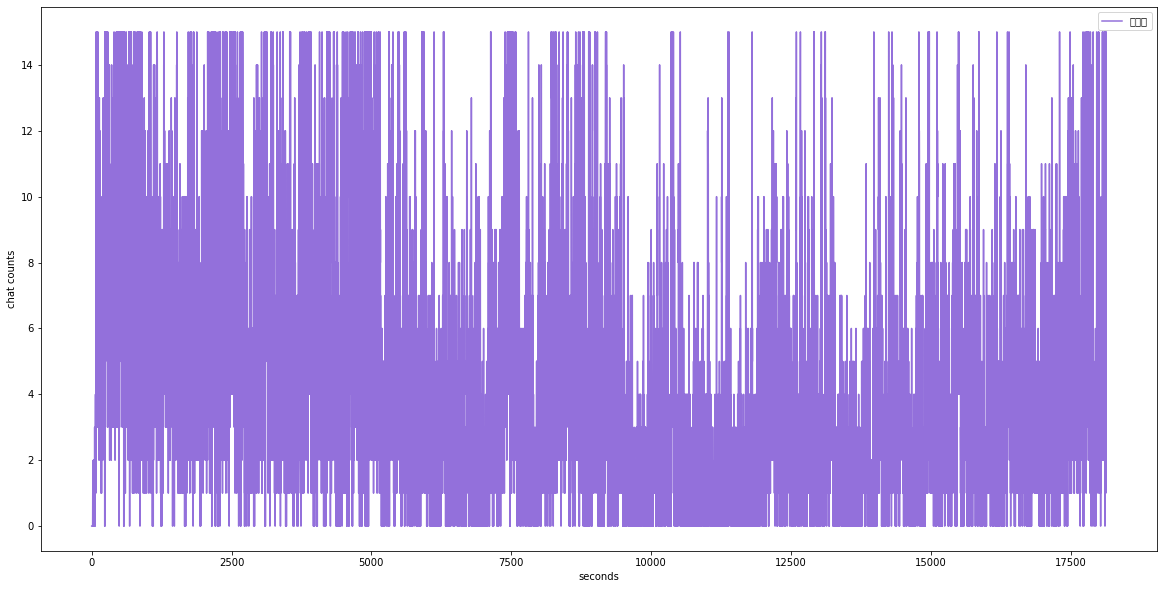

In [9]:
df1.plot(kind='line', figsize=(20,10), color='mediumpurple')
plt.xlabel("seconds")
plt.ylabel("chat counts")
plt.savefig('./903242294.png')

## 채팅 트래픽 기반 하이라이트 추출

### 하이라이트 알고리즘 parameter 설정

In [10]:
chat.count()

일시       79903
시청자ID    79903
채팅내용     79903
dtype: int64

In [11]:
a = np.percentile(df1['채팅수'], 99) 
a

15.0

In [12]:
b = df1['채팅수'].mean()
b

4.406010476978219

In [13]:
c = np.std(df1['채팅수'])
c

3.627709011113276

In [14]:
t = (a - b) / c
t

2.920297490941999

In [15]:
df1['채팅수']

0         0
1         0
2         0
3         0
4         0
         ..
18130     9
18131    15
18132     7
18133    10
18134     8
Name: 채팅수, Length: 18135, dtype: int64

### 하이라이트 선정 알고리즘

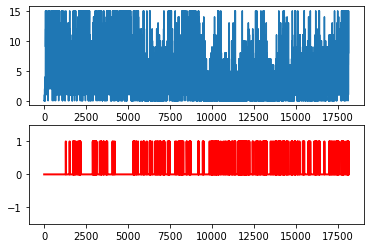

In [16]:
import numpy as np
import pylab


def init(x, lag, threshold, influence):

    labels = np.zeros(lag) 
    filtered_y = np.array(x[0:lag]) 
    avg_filter = np.zeros(lag)
    std_filter = np.zeros(lag)
    var_filter = np.zeros(lag)

    avg_filter[lag - 1] = np.mean(x[0:lag])
    std_filter[lag - 1] = np.std(x[0:lag])
    var_filter[lag - 1] = np.var(x[0:lag])

    return dict(avg=avg_filter[lag - 1],
                var=var_filter[lag - 1],
                std=std_filter[lag - 1],
                filtered_y=filtered_y,
                labels=labels)

def add(esult, single_value, lag, threshold, influence):
    previous_avg = result['avg']
    previous_var = result['var']
    previous_std = result['std']
    filtered_y = result['filtered_y']
    labels = result['labels']

    if abs(single_value - previous_avg) > threshold * previous_std:
        if single_value > previous_avg:
            labels = np.append(labels, 1)
        else:
            labels = np.append(labels, -1)

        filtered_y = np.append(filtered_y, influence * single_value
                               + (1 - influence) * filtered_y[-1])
    else:
        labels = np.append(labels, 0)
        filtered_y = np.append(filtered_y, single_value)

    current_avg_filter = previous_avg + 1. / lag * (filtered_y[-1]
            - filtered_y[len(filtered_y) - lag - 1])

    current_var_filter = previous_var + 1. / lag * ((filtered_y[-1]
            - previous_avg) ** 2 - (filtered_y[len(filtered_y) - 1
            - lag] - previous_avg) ** 2 - (filtered_y[-1]
            - filtered_y[len(filtered_y) - 1 - lag]) ** 2 / lag)  
    
    current_std_filter = np.sqrt(current_var_filter)

    return dict(avg=current_avg_filter,
                var=current_var_filter,
                std=current_std_filter,
                filtered_y=filtered_y[1:],
                labels=labels)

lag = 150
threshold = t
influence = 0

y = df1['채팅수']

result = init(y[:lag], lag=lag, threshold=threshold, influence=influence)

for i in y[lag:]:
    result = add(result, i, lag, threshold, influence)

pylab.subplot(211)
pylab.plot(np.arange(1, len(y) + 1), y)
pylab.subplot(212)
pylab.step(np.arange(1, len(y) + 1), result['labels'], color='red',
           lw=2)
pylab.ylim(-1.5, 1.5)
pylab.show()

In [17]:
highlight_result = result['labels']
highlight_result

array([0., 0., 0., ..., 0., 0., 0.])

In [18]:
column_highlight = ['하이라이트 여부']
df2 = pd.DataFrame(highlight_result, columns=column_highlight)
df2 = df2.replace(0.0, "X")
df2 = df2.replace(1.0, "O")
df2

,하이라이트 여부
0,X
1,X
2,X
3,X
4,X
...,...
18130,X
18131,O
18132,X
18133,X


In [19]:
chat_highlightall = pd.concat([df1, df2], axis=1)
chat_highlightall

,시간,채팅수,하이라이트 여부
0,00:00:00,0,X
1,00:00:01,0,X
2,00:00:02,0,X
3,00:00:03,0,X
4,00:00:04,0,X
...,...,...,...
18130,05:02:10,9,X
18131,05:02:11,15,O
18132,05:02:12,7,X
18133,05:02:13,10,X


In [20]:
chat_highlight = chat_highlightall[chat_highlightall['하이라이트 여부'] == "O"]
chat_highlight

,시간,채팅수,하이라이트 여부
1291,00:21:31,15,O
1519,00:25:19,14,O
1522,00:25:22,15,O
1717,00:28:37,13,O
1727,00:28:47,15,O
...,...,...,...
18117,05:01:57,15,O
18120,05:02:00,15,O
18122,05:02:02,15,O
18123,05:02:03,15,O


In [21]:
# csv로 변환 후 비교해보기

chat_highlight.to_csv("[Chat Highlight]랄로_903242294.csv")